In [1]:
import xarray as xr
import numpy as np
import cmocean as cm
import os
import pandas as pd
from matplotlib import cm as cmap
%matplotlib inline

In [2]:
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.ticker as mticker
import cmocean as cm

In [3]:
land_50m = feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='#DFD1AF',
                                        linewidth=0.2)

In [4]:
import matplotlib
#matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["text.latex.preamble"] = r'\usepackage{xfrac}'

In [5]:
eddy_climat =xr.open_dataset('../datasets/climatology/gridded_TrackEddy_stats_climatology.nc')

In [6]:
eddy_climat_chelton=xr.open_dataset('~/v45/scripts_papers/paper_transient_climatology/eddy_stats_chelton.nc')

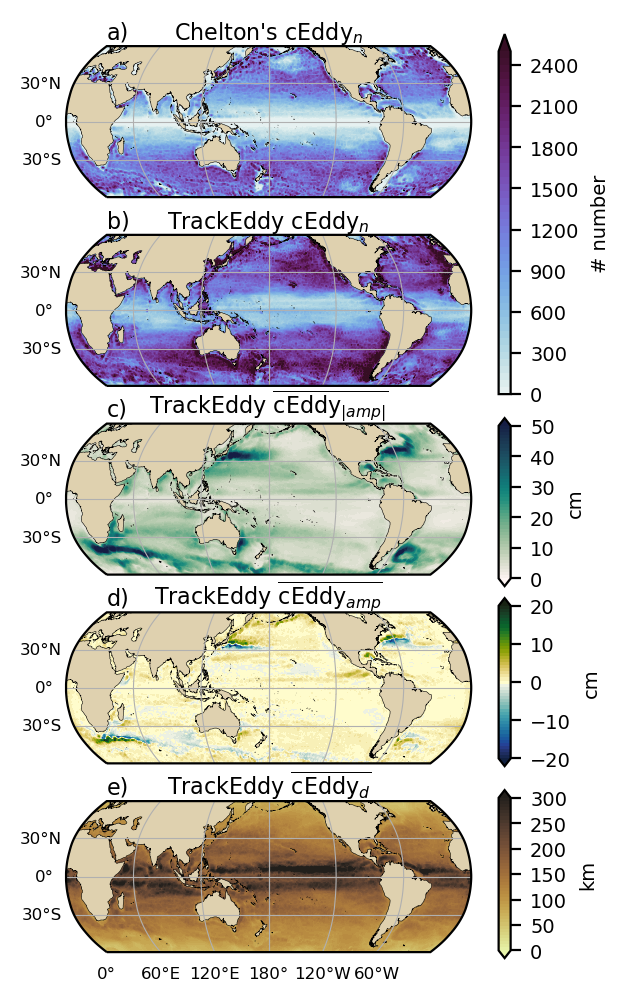

In [7]:
cmap = 'rainbow'

cbar_kwargs=dict(pad=0.15, shrink=1, label=r'')

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(4, 6),dpi=200, 
                                    subplot_kw={'projection': ccrs.Robinson(central_longitude=180)})
# Ratios
eddy_n_c = eddy_climat_chelton.eddy_count
eddy_n = eddy_climat.eddy_count
eddy_amp = eddy_climat.eddy_amp*100 # Change units to cm
eddy_diameter = eddy_climat.eddy_diameter

eddy_amp_pos = eddy_climat.pos_eddy_amp*100 # Change units to cm
eddy_amp_neg = eddy_climat.neg_eddy_amp*100 # Change units to cm

## Subplot

clm = eddy_n_c.plot.contourf(ax=ax1,transform =ccrs.PlateCarree(),cmap=cm.cm.dense,
                                vmin=0,vmax=2500, add_colorbar = False,levels=50)
for c in clm.collections:
    c.set_rasterized(True)
    
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(land_50m)
ax1.set_title(r"Chelton's $\mathrm{cEddy}_n$", fontsize=8, pad=2)

## Subplot
clm1 = eddy_n.plot.contourf(ax=ax2,transform =ccrs.PlateCarree(),cmap=cm.cm.dense,
                                vmin=0,vmax=2500, add_colorbar = False,levels=50)
for c in clm1.collections:
    c.set_rasterized(True)
    
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(land_50m)
ax2.set_title(r"TrackEddy $\mathrm{cEddy}_n$", fontsize=8, pad=2)

## Subplot
clm3 = ((eddy_amp_pos-eddy_amp_neg)/2).plot.contourf(ax=ax3,transform =ccrs.PlateCarree(),cmap=cm.cm.tempo,
                                vmin=0,vmax=50, add_colorbar = False,levels=50)
for c in clm3.collections:
    c.set_rasterized(True)
    
ax3.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax3.add_feature(land_50m)
ax3.set_title(r'TrackEddy $\overline{\mathrm{cEddy}_{|amp|}}$', fontsize=8, pad=2)

## Subplot
clm4 = ((eddy_amp_pos+eddy_amp_neg)/2).plot.contourf(ax=ax4,transform =ccrs.PlateCarree(),cmap=cm.cm.delta,
                                vmin=-20,vmax=20, add_colorbar = False,levels=50)
for c in clm4.collections:
    c.set_rasterized(True)
    
ax4.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax4.add_feature(land_50m)
ax4.set_title(r'TrackEddy $\overline{\mathrm{cEddy}_{amp}}$', fontsize=8, pad=2)

## Subplot
clm5 = (eddy_diameter).plot.contourf(ax=ax5,transform =ccrs.PlateCarree(),cmap=cm.cm.turbid,
                                vmin=0,vmax=300, add_colorbar = False,levels=50)
for c in clm5.collections:
    c.set_rasterized(True)
    
ax5.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax5.add_feature(land_50m)
ax5.set_title(r'TrackEddy $\overline{\mathrm{cEddy}_{d}}$', fontsize=8, pad=2)


cbar_ax = fig.add_axes([0.8, 0.59, 0.015, 0.3])
cbar=fig.colorbar(clm, cax=cbar_ax, orientation='vertical', ticks=np.arange(0,2700,300))
cbar.set_label('# number', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

cbar_ax = fig.add_axes([0.8, 0.43, 0.015, 0.14])
cbar=fig.colorbar(clm3, cax=cbar_ax, orientation='vertical',ticks=np.arange(0,55,10))
cbar.set_label('cm', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

cbar_ax = fig.add_axes([0.8, 0.28, 0.015, 0.14])
cbar=fig.colorbar(clm4, cax=cbar_ax, orientation='vertical',ticks=np.arange(-20,25,10))
cbar.set_label('cm', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

cbar_ax = fig.add_axes([0.8, 0.12, 0.015, 0.14])
cbar=fig.colorbar(clm5, cax=cbar_ax, orientation='vertical',ticks=np.arange(0,350,50))
cbar.set_label('km', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

ax1.text(0.1,1.05,r'a)',fontsize=8,transform=ax1.transAxes)
ax2.text(0.1,1.05,r'b)',fontsize=8,transform=ax2.transAxes)
ax3.text(0.1,1.05,r'c)',fontsize=8,transform=ax3.transAxes)
ax4.text(0.1,1.05,r'd)',fontsize=8,transform=ax4.transAxes)
ax5.text(0.1,1.05,r'e)',fontsize=8,transform=ax5.transAxes)

gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels=False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.bottom_labels=False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels=False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels=False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax5.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

plt.subplots_adjust(wspace=0.05, hspace=0.25)

plt.savefig('./Figure_5_global_stats.pdf',dpi=300,bbox_inches='tight')

In [14]:
datat = "/home/156/jm5970/v45/rossrad.dat"

In [15]:
rossr = np.loadtxt(datat)

In [16]:
import pandas as pd

In [17]:
rossrad = {}
rossrad['lon']= rossr[:,0]
rossrad['lat'] = rossr[:,1]
rossrad['c1'] = rossr[:,2]
rossrad['rossby_rad']= rossr[:,3]

In [18]:
rd = pd.DataFrame.from_dict(rossrad)

(-60.0, 60.0)

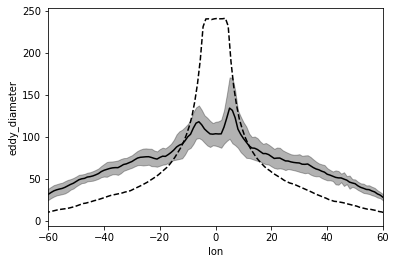

In [19]:
mean_lon = (eddy_diameter.where(eddy_diameter!=0).mean('lon')/2)

std_lon = (eddy_diameter.where(eddy_diameter!=0).std('lon')/2)

mean_lon.plot(x='lat',color='k')
plt.fill_between(mean_lon.lat,mean_lon-std_lon,mean_lon+std_lon, alpha=0.3,color='k')
# (eddy_diameter.where(eddy_diameter!=0).max('lon')/2).plot(x='lat')

(rd.groupby('lon').mean().rossby_rad).plot(linestyle='--',color='k')

plt.xlim((-60,60))

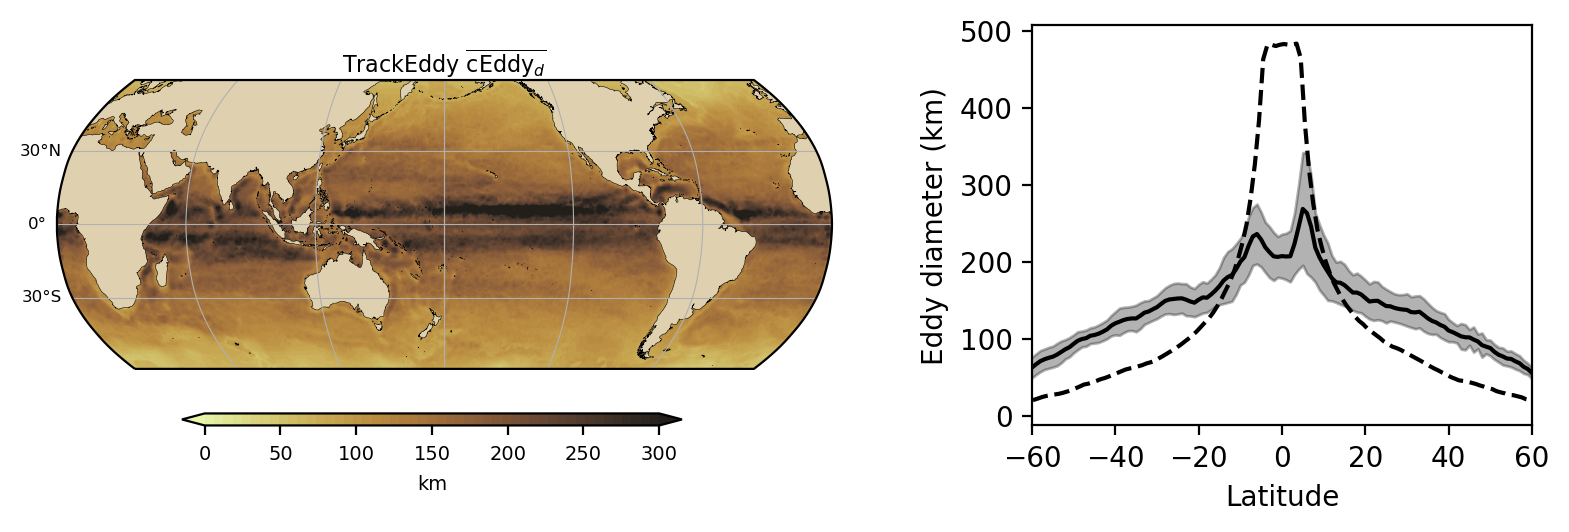

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2),dpi=200, 
                                    subplot_kw={'projection': ccrs.Robinson(central_longitude=180)})

clm = eddy_diameter.plot.contourf(ax=ax, transform =ccrs.PlateCarree(),cmap=cm.cm.turbid,
                                vmin=0,vmax=300, add_colorbar = False,levels=50)

for c in clm.collections:
    c.set_rasterized(True)
    
ax.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.set_title(r'TrackEddy $\overline{\mathrm{cEddy}_{d}}$', fontsize=8, pad=2)


cbar_ax = fig.add_axes([0.25, 0.0, 0.5, 0.03])
cbar=fig.colorbar(clm, cax=cbar_ax, orientation='horizontal',ticks=np.arange(0,350,50))
cbar.set_label('km', rotation=0, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels=False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

ax1 = fig.add_axes([1.1, 0, 0.5, 1])

mean_lon = (eddy_diameter.where(eddy_diameter!=0).mean('lon'))
std_lon = (eddy_diameter.where(eddy_diameter!=0).std('lon'))

mean_lon.plot(x='lat',color='k',ax=ax1)
ax1.fill_between(mean_lon.lat,mean_lon-std_lon,mean_lon+std_lon, alpha=0.3,color='k')

(2*rd.groupby('lon').mean().rossby_rad).plot(linestyle='--',color='k')

ax1.set_ylabel('Eddy diameter (km)')
ax1.set_xlabel('Latitude')
ax1.set_xlim((-60,60))

plt.savefig("./eddy_diameter.png",dpi=300,bbox_inches='tight')